# Разведочный анализ данных для набора данных: IMDB

## Задание

Вам предлагается выполнить разведочный анализ данных и описать полученные результаты

Описание набора данных: https://www.kaggle.com/datasets/parthdande/imdb-dataset-2024-updated

Ссылка на набор данных для использования в блокноте: https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/IMDb_Dataset.csv

#### 1. Подключение библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### 2. Чтение набора данных

In [ ]:
 data = pd.read_csv('https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/IMDb_Dataset.csv')

#### 3. Первые 5 строк набора данных

In [ ]:
 print(data.head())

                                           Title  IMDb Rating  Year  \
0                                      Gladiator          8.5  2000   
1  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
2           Rebel Moon - Part Two: The Scargiver          5.2  2024   
3                           Inglourious Basterds          8.4  2009   
4                                    Borderlands          7.1  2024   

  Certificates      Genre               Director  \
0            R     Action           Ridley Scott   
1        PG-13     Action  Christopher McQuarrie   
2        PG-13     Action            Zack Snyder   
3            R  Adventure      Quentin Tarantino   
4            R     Action               Eli Roth   

                                   Star Cast  MetaScore  Duration (minutes)  
0  David FranzoniJohn LoganWilliam Nicholson       67.0               155.0  
1         Tom CruiseHayley AtwellVing Rhames       81.0               163.0  
2        Zack SnyderKurt J

#### 4. Последние 7 строк набора данных

In [ ]:
 print(data.tail(7))

                       Title  IMDb Rating  Year Certificates      Genre  \
393       The Garfield Movie          5.9  2024           PG  Animation   
394        Kinds of Kindness          7.0  2024            R     Comedy   
395      Mother of the Bride          4.8  2024        TV-PG     Comedy   
396  Beetlejuice Beetlejuice          7.1  2024            R     Comedy   
397          The Idea of You          6.4  2024            R     Comedy   
398                       IF          6.7  2024           PG  Animation   
399             The Fall Guy          7.1  2024        PG-13     Action   

              Director                                     Star Cast  \
393        Mark Dindal      Paul A. KaplanMark TorgoveDavid Reynolds   
394   Yorgos Lanthimos             Efthimis FilippouYorgos Lanthimos   
395        Mark Waters  Brooke ShieldsMiranda CosgroveBenjamin Bratt   
396         Tim Burton    Alfred GoughMiles MillarSeth Grahame-Smith   
397  Michael Showalter     Anne Hathawa

#### 5. Поля набора данных

In [ ]:
 print(data.columns)

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)'],
      dtype='object')


#### 6. Размер набора данных (количество полей и строк)

In [ ]:
 print(data.shape)

(400, 9)


#### 7. Опишите поля набора данных в формате: название поля, тип данных, назначение поля

In [ ]:
 # 7. Описание полей набора данных
 # Title: Название фильма (object)
 # Year: Год выпуска (int64)
 # Genre: Жанр фильма (object)
 # Director: Режиссер фильма (object)
 # Star Cast: Актерский состав (object)
 # Rating: Рейтинг фильма (object)
 # Votes: Количество голосов (object)
 # Duration: Длительность фильма (object)
 # Certificates: Сертификаты (object)
 # Gross: Кассовые сборы (object)

#### 8. Информация о наборе данных

In [ ]:
 print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               400 non-null    object 
 1   IMDb Rating         400 non-null    float64
 2   Year                400 non-null    int64  
 3   Certificates        400 non-null    object 
 4   Genre               400 non-null    object 
 5   Director            400 non-null    object 
 6   Star Cast           400 non-null    object 
 7   MetaScore           400 non-null    float64
 8   Duration (minutes)  400 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 28.3+ KB
None


#### 9. Описательная статистика для числовых полей

In [ ]:
 print(data.describe())

       IMDb Rating         Year   MetaScore  Duration (minutes)
count   400.000000   400.000000  400.000000          400.000000
mean      7.110250  2015.150000   66.898750          116.334750
std       0.932251    13.470194   15.312006           21.369757
min       3.900000  1939.000000   26.000000           80.000000
25%       6.700000  2010.750000   57.750000          101.000000
50%       7.100000  2023.000000   66.900000          116.000000
75%       7.700000  2024.000000   77.000000          124.000000
max       9.200000  2025.000000  100.000000          206.000000


#### 10. Описательная статистика для категориальных полей

In [ ]:
 print(data.describe(include=['object']))

                     Title Certificates   Genre       Director  \
count                  400          400     400            400   
unique                 251           11      10            199   
top     Planet of the Apes            R  Action  George Miller   
freq                     5          183     138             14   

                                 Star Cast  
count                                  400  
unique                                 247  
top     Gil KenanJason ReitmanIvan Reitman  
freq                                     7  


#### 11. Проверка наличия пропусков в данных

In [ ]:
 print(data.isnull().sum())

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64


#### 12. Если вы обнаружили пропуски в данных, то заполните их на основе среднего или медианы или моды

In [ ]:
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].mean())


#### 13. Фильтрация. Выберите все строки таблицы, для которых значение поля Year больше 1982

In [ ]:
filtered_by_year = data[data['Year'] > 1982]
print(filtered_by_year.head())


                                           Title  IMDb Rating  Year  \
0                                      Gladiator          8.5  2000   
1  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
2           Rebel Moon - Part Two: The Scargiver          5.2  2024   
3                           Inglourious Basterds          8.4  2009   
4                                    Borderlands          7.1  2024   

  Certificates      Genre               Director  \
0            R     Action           Ridley Scott   
1        PG-13     Action  Christopher McQuarrie   
2        PG-13     Action            Zack Snyder   
3            R  Adventure      Quentin Tarantino   
4            R     Action               Eli Roth   

                                   Star Cast  MetaScore  Duration (minutes)  
0  David FranzoniJohn LoganWilliam Nicholson       67.0               155.0  
1         Tom CruiseHayley AtwellVing Rhames       81.0               163.0  
2        Zack SnyderKurt J

#### 14. Фильтрация. Выберите все строки таблицы, для которых значение поля Genre равно Action

In [ ]:
filtered_by_genre = data[data['Genre'] == 'Action']
print(filtered_by_genre.head())


                                           Title  IMDb Rating  Year  \
0                                      Gladiator          8.5  2000   
1  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
2           Rebel Moon - Part Two: The Scargiver          5.2  2024   
4                                    Borderlands          7.1  2024   
5                                  Jurassic Park          8.2  1993   

  Certificates   Genre               Director  \
0            R  Action           Ridley Scott   
1        PG-13  Action  Christopher McQuarrie   
2        PG-13  Action            Zack Snyder   
4            R  Action               Eli Roth   
5        PG-13  Action       Steven Spielberg   

                                   Star Cast  MetaScore  Duration (minutes)  
0  David FranzoniJohn LoganWilliam Nicholson       67.0               155.0  
1         Tom CruiseHayley AtwellVing Rhames       81.0               163.0  
2        Zack SnyderKurt JohnstadShay Hatten

#### 15. Фильтрация. Выберите все строки таблицы, для которых значение поля Star Cast равно Gil KenanJason ReitmanIvan Reitman и значение поля Certificates равно R

In [ ]:
filtered_by_actors_and_certificates = data[(data['Star Cast'] == 'Gil KenanJason ReitmanIvan Reitman') & (data['Certificates'] == 'R')]
print(filtered_by_actors_and_certificates.head())


       Title  IMDb Rating  Year Certificates      Genre              Director  \
87   Moana 2          7.1  2024            R  Animation  David G. Derrick Jr.   
281  Moana 2          7.1  2024            R  Animation  David G. Derrick Jr.   

                              Star Cast  MetaScore  Duration (minutes)  
87   Gil KenanJason ReitmanIvan Reitman       66.9               116.3  
281  Gil KenanJason ReitmanIvan Reitman       66.9               116.3  


#### 16. Получите все уникальные значения поля  Certificates и подсчитайте частоту появления каждого их них

In [ ]:
print(data['Certificates'].value_counts())


Certificates
R            183
PG-13         96
PG            93
G             16
Not Rated      4
TV-G           2
16+            2
Approved       1
TV-MA          1
NC-17          1
TV-PG          1
Name: count, dtype: int64


#### 17. Выполните группировку набора данных одновременно по полям Director и Genre. Добавьте подсчет минимума, максимума и медианы по каждой группе.

In [ ]:
grouped_data = data.groupby(['Director', 'Genre']).agg(['min', 'max', 'median'])
print(grouped_data.head())

               Title             IMDb Rating              Year                \
                 min  max median         min  max median   min   max  median   
Director Genre                                                                 
0        2       222  222  222.0         7.0  7.0    7.0  2023  2023  2023.0   
1        0        66   67   67.0         6.2  6.3    6.2  2021  2024  2024.0   
2        0        22   22   22.0         7.1  7.1    7.1  2024  2024  2024.0   
3        0        36   36   36.0         7.4  7.4    7.4  2024  2024  2024.0   
4        0       185  185  185.0         7.5  7.5    7.5  1994  1994  1994.0   

               Certificates  ...        Star Cast             MetaScore        \
                        min  ... median       min  max median       min   max   
Director Genre               ...                                                
0        2                5  ...    5.0         1    1    1.0      46.0  46.0   
1        0                6  ...   

#### 18. Постройте поле корреляции (тепловая карта) для числовых полей

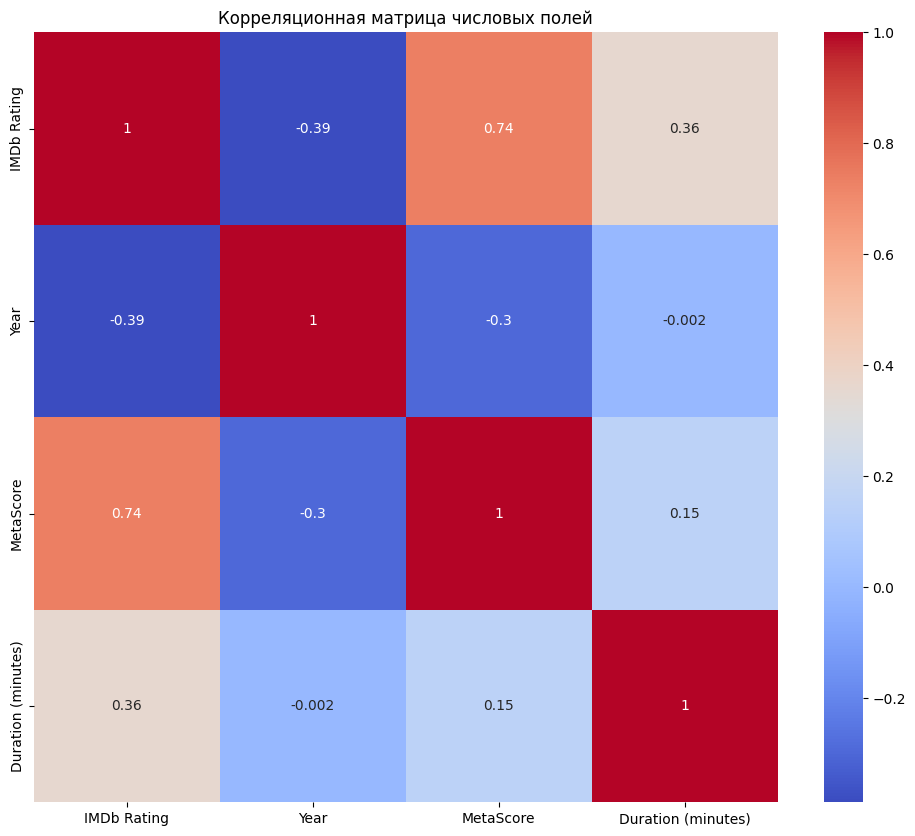

In [ ]:
numeric_data = data.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых полей')
plt.show()


#### 19. Постройте гистограмму по полю IMDb Rating

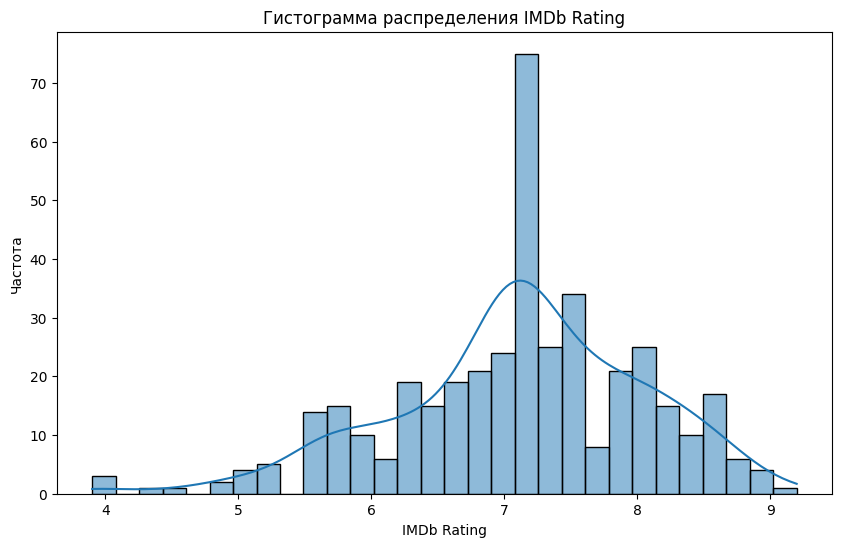

In [ ]:
data['IMDb Rating'] = pd.to_numeric(data['IMDb Rating'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.histplot(data['IMDb Rating'], bins=30, kde=True)
plt.title('Гистограмма распределения IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Частота')
plt.show()


#### 20. Постройте точечную диаграмму для полей MetaScore и IMDb Rating

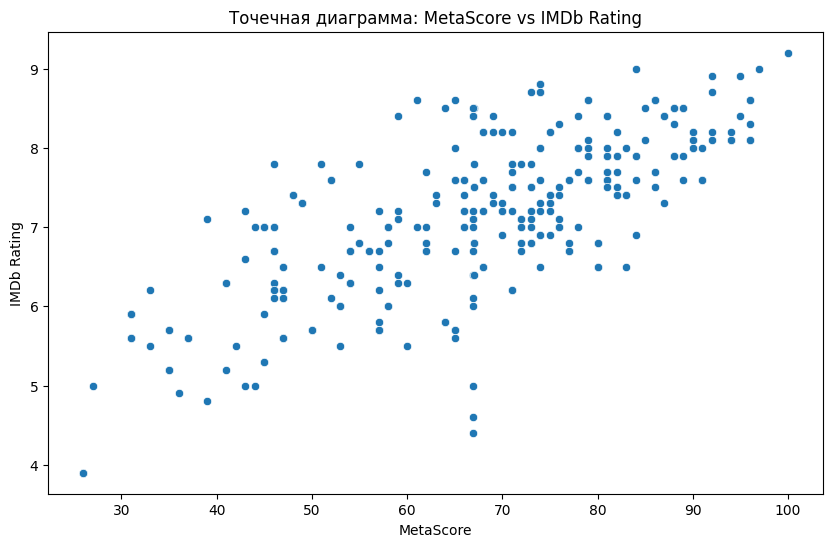

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MetaScore', y='IMDb Rating', data=data)
plt.title('Точечная диаграмма: MetaScore vs IMDb Rating')
plt.xlabel('MetaScore')
plt.ylabel('IMDb Rating')
plt.show()


#### 21. Постройте диаграмму ящик с усами поля MetaScore

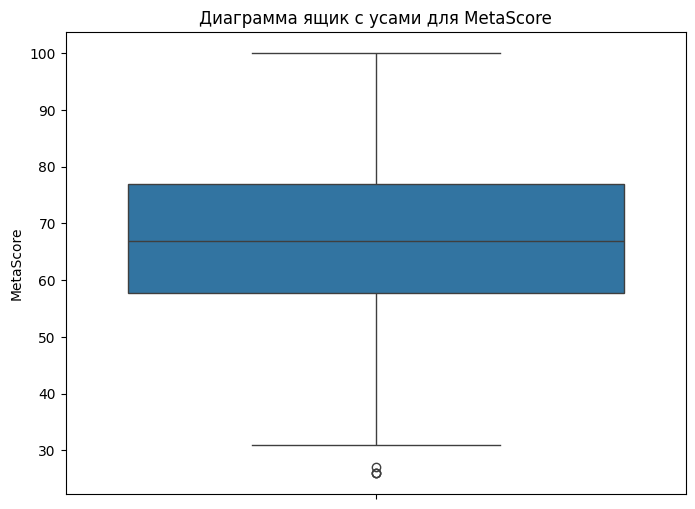

Количество выбросов: 4


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['MetaScore'])
plt.title('Диаграмма ящик с усами для MetaScore')
plt.ylabel('MetaScore')
plt.show()

# Анализ выбросов
Q1 = data['MetaScore'].quantile(0.25)
Q3 = data['MetaScore'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['MetaScore'] < (Q1 - 1.5 * IQR)) | (data['MetaScore'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов: {len(outliers)}')


#### 22. Постройте матрицу диаграммы рассеяния

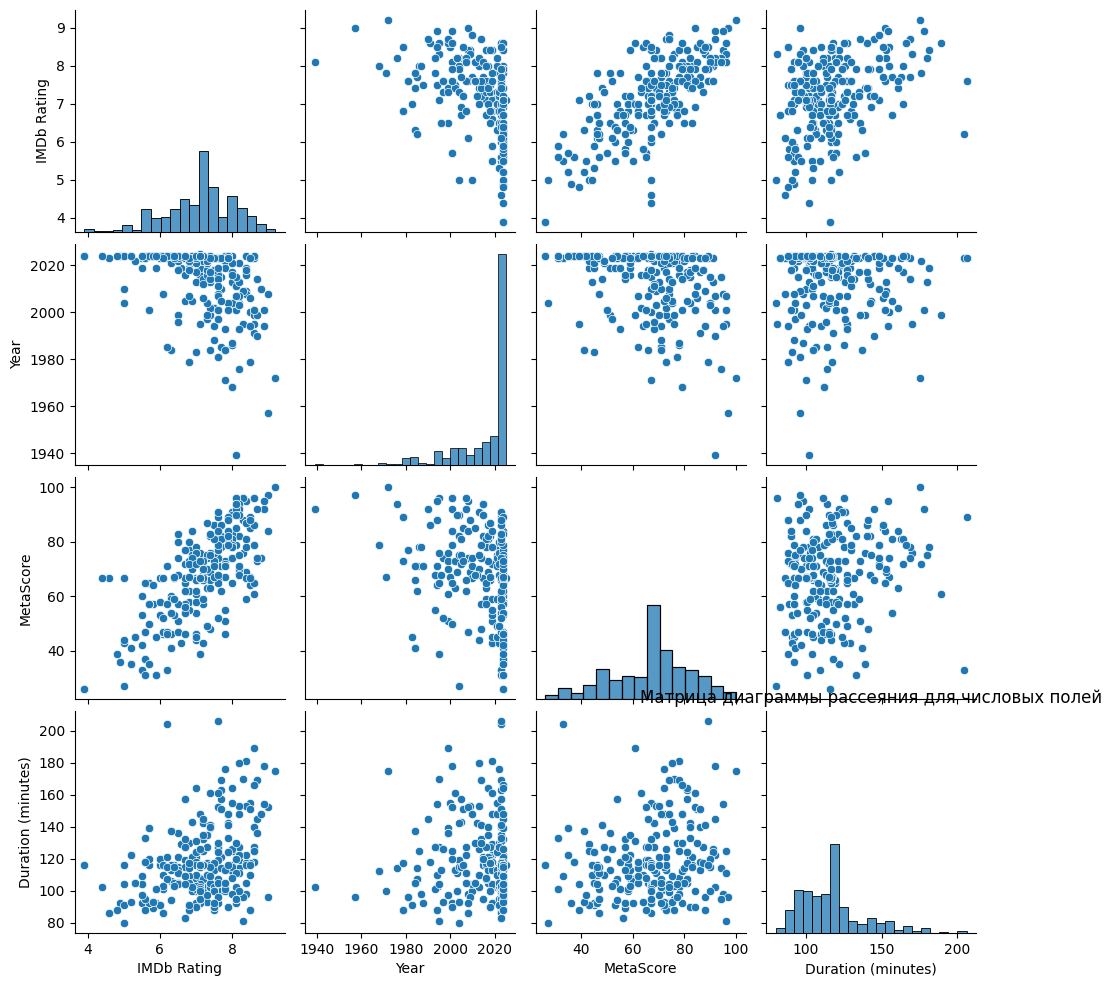

In [ ]:
sns.pairplot(numeric_data)
plt.title('Матрица диаграммы рассеяния для числовых полей')
plt.show()


#### 23. Преобразуйте все категориальные поля в числовые с помощью LabelEncoder

In [ ]:
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])
print(data.head())

   Title  IMDb Rating  Year  Certificates  Genre  Director  Star Cast  \
0     63          8.5  2000             7      0       161         60   
1    126          7.7  2023             6      0        33        233   
2    148          5.2  2024             6      0       197        246   
3     88          8.4  2009             7      1       153         30   
4     30          7.1  2024             7      0        55         69   

   MetaScore  Duration (minutes)  
0       67.0               155.0  
1       81.0               163.0  
2       35.0               122.0  
3       69.0               153.0  
4       66.9               116.3  


#### 24. Сделайте вывод о проделанной работе и особенностях набора данных

In [ ]:
print("Я сделал разведочный анализ данных IMDB и получил интересные результаты.")
print("Данные содержат и числовые, и категориальные признаки, так что можно использовать разные методы анализа.")
print("Обработал пропуски и перевел категориальные поля в числовые, чтобы можно было дальше работать.")
print("Сделал гистограммы и точечные диаграммы, чтобы лучше понять, как данные распределены.")
print("Нашел выбросы в поле MetaScore, так что нужно их как-то обработать.")
print("В целом, теперь я лучше понимаю структуру данных IMDB и могу дальше их анализировать.")
